## Auto oscillations

We discuss the auto-oscillations in 2D systems. The

### Theory:

Assume we have a system near a harmonic oscillator:

$$
\begin{array}{ll}
\dot{x_1} &= x_2 + ϵf_1(x_1,x_2)\\
\dot{x_2} &= -x_1 + ϵf_2(x_1,x_2)
\end{array}
$$

where $\epsilon$ is a small parameter. 
From the theory of smooth dependence of solutions on parameters we know that if ϵ is small then the solution can be expressed (for finite times) as,

$$
\begin{array}{ll}
x_1(t) &= x_1^0(t) + ϵ x_1^1(t) + O(ϵ^2) \\
x_2(t) &= x_2^0(t) + ϵ x_2^1(t) + O(ϵ^2)
\end{array}
$$

Where $(x_1^0,x_2^0)$ is the solution to the equation system for $\epsilon=0$, namely a circle of radious $r=\sqrt{2E}$. Where $E(x):= \frac{1}{2}(x_1^2 + x_2^2)$.

Now,

$$
\dot{E} = x_1 \dot{x_1} + x_2 \dot{x_2} ≈ ϵ [x_1^0 f_1(x^0) - x_2^0 f_2(x^0)] + O(ϵ^2)
$$

Integrating over an orbit of the unperturbed system we get,x_2

$$
\begin{array}{ll}
\Delta E &= ϵ \int_0^{2π}[x_1^0 f_1(x^0) + x_2^0 f_2(x^0)]\; dt \\
&= ϵ \int_0^{2π}[-\dot{x_2^0} f_1(x^0) + \dot{x_1^0} f_2(x^0)]\; dt \\
&= ϵ \oint[-dx_2^0 f_1(x^0) + dx_1^0 f_2(x^0)] \\
&= - ϵ \oint \vec{f} \wedge d\vec{l} \\
&= F(E)
\end{array}
$$

Thus, at radious where $F(E)$ is positive the solution will grow, and where it is negative will spirall inwards. At points where it is zero there will be a limit cycle, wich will be stable when $F'(E)$ is negative, and unstable when it is positive.

Example: consider an $\vec{f}$ which is radial, at some points pointing inwards at some points outwards.

$$
\vec{f}(x) = \frac{r(1-r)}{(1+r^3)}(x_1, x_2)
$$

$$
F(E) = ϵ \frac{r(1-r)}{1+r^3} \int_0^{2π} (x_1^2 + x_2^2) dt = ϵ 2\pi \frac{r^3(1-r)}{1+r^3}
$$

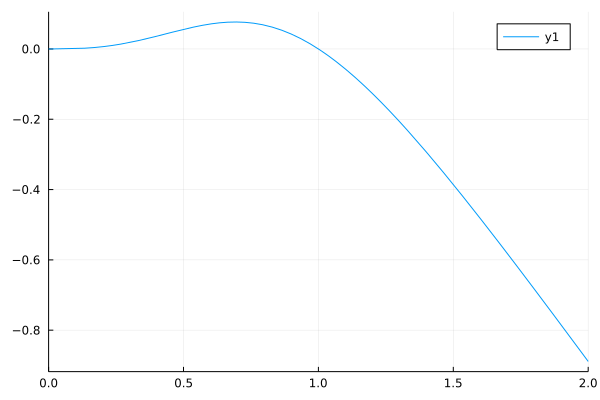

In [42]:
plot(x->x^3*(1-x)/(1+x^3), xlim=(0,2))

In [12]:
function f(x)
    r = sqrt(x[1]^2 + x[2]^2)
    return [x[1];x[2]]*r*(1-r)/(1+r^3)
end

function harmonic_perturb(x,t,p)
    (f,ϵ) = p
    return [x[2];-x[1]] + ϵ*f(x)
end

harmonic_perturb (generic function with 2 methods)

In [17]:
function RK4(f,y0,t0,h,p,k)
    k1, k2, k3, k4 = k
    k1 = h*f(y0,t0,p)
    k2 = h*f(y0+0.5*k1, t0+0.5*h,p)
    k3 = h*f(y0+0.5*k2, t0+0.5*h,p)
    k4 = h*f(y0+k3, t0+h,p)
    return y0 + (k1 + 2k2 + 2k3 + k4)./6
end

function ODEproblem(Method, f, y0, intervalo, M,p,k)
    ti,tf = intervalo
    h = (tf-ti)/(M-1)
    N = length(y0)
    y = zeros(N,M)
    t = zeros(M)
    y[:,1] = y0
    t[1] = ti
    for i in 2:M
        t[i] = t[i-1] + h
        y[:,i] = Method(f,y[:,i-1],t[i-1],h,p,k)
    end
    return (t ,y)
end

using Plots

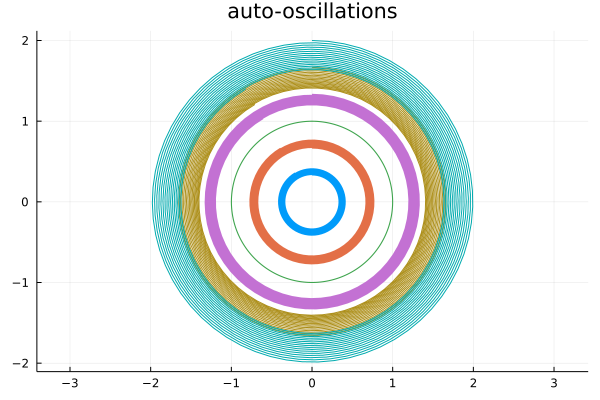

In [35]:
intervalo = (0,100)
N = 2

M = 1000
p = (f,0.01)
k = (zeros(N), zeros(N), zeros(N), zeros(N))

plt = plot(title= "auto-oscillations", aspectratio=1,)
for i in 1:6
    y0 = [0;i/3]
    t, y = ODEproblem(RK4, harmonic_perturb, y0, intervalo, M,p,k)
    plot!(y[1,:],y[2,:], label="")
end
plt

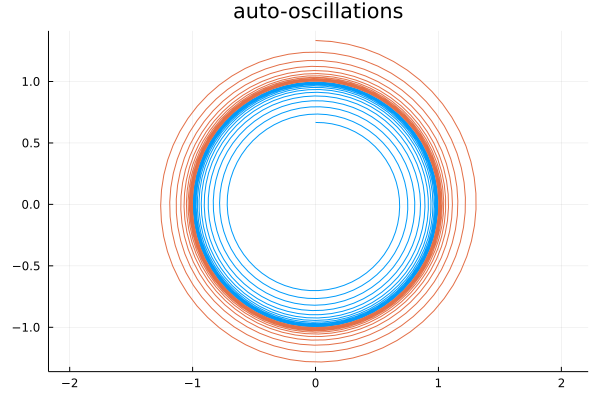

In [37]:
intervalo = (0,100)
N = 2

M = 1000
p = (f,0.1)
k = (zeros(N), zeros(N), zeros(N), zeros(N))

plt = plot(title= "auto-oscillations", aspectratio=1,)
for i in 1:2
    y0 = [0;i/1.5]
    t, y = ODEproblem(RK4, harmonic_perturb, y0, intervalo, M,p,k)
    plot!(y[1,:],y[2,:], label="")
end
plt